In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Data_svm.csv')
# Định nghĩa mapping cho ký tự đặc biệt
label_mapping = {
    'DD': 'Đ'  # Map DD thành Đ
}

# Hàm chuyển đổi nhãn
def convert_label(label):
    return label_mapping.get(label, label)

In [4]:

df.columns = [i for i in range(df.shape[1])]
df[63] = df[63].apply(convert_label)
df.shape

(3399, 64)

In [5]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.478777,0.648984,-1.212763e-06,0.368127,0.559124,-0.032591,0.310667,0.406661,-0.043461,0.313129,...,0.582453,0.277838,-0.056691,0.558252,0.370022,-0.033956,0.553420,0.405990,-0.006912,A
1,0.471140,0.660596,-1.215430e-06,0.358943,0.570950,-0.031468,0.300407,0.411810,-0.041411,0.301818,...,0.572542,0.282130,-0.059155,0.548896,0.376113,-0.035905,0.546030,0.415560,-0.008448,A
2,0.474636,0.669555,-1.222520e-06,0.361092,0.580992,-0.034053,0.302979,0.417852,-0.044380,0.306774,...,0.583145,0.290868,-0.061465,0.557471,0.385250,-0.038289,0.551601,0.423175,-0.010696,A
3,0.477416,0.680248,-1.207101e-06,0.363771,0.587916,-0.035476,0.305330,0.424321,-0.046515,0.309174,...,0.592450,0.297312,-0.062883,0.563827,0.393392,-0.039225,0.558350,0.431706,-0.010179,A
4,0.488174,0.690962,-1.245276e-06,0.374129,0.599230,-0.040466,0.313064,0.432458,-0.053501,0.315450,...,0.607548,0.306281,-0.061818,0.578865,0.405488,-0.039413,0.571863,0.439538,-0.011424,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0.193406,1.037017,1.559424e-07,0.280218,0.865651,0.021600,0.313462,0.701379,-0.015786,0.370443,...,0.342185,0.692825,-0.192663,0.343782,0.769679,-0.153451,0.297004,0.805506,-0.124769,9
3395,0.196497,1.035439,1.652906e-07,0.269551,0.868951,0.022136,0.299892,0.700341,-0.014373,0.360994,...,0.344127,0.691361,-0.194357,0.345474,0.767356,-0.155366,0.298829,0.803485,-0.126872,9
3396,0.198217,1.036213,1.964999e-07,0.249176,0.867631,0.026198,0.275625,0.700165,-0.012480,0.344893,...,0.346292,0.686467,-0.199712,0.349053,0.763754,-0.156219,0.302921,0.803517,-0.125301,9
3397,0.195335,1.034002,1.706392e-07,0.236116,0.866822,0.030396,0.263204,0.701694,-0.006533,0.332890,...,0.345547,0.681740,-0.196888,0.349739,0.758731,-0.152795,0.305368,0.800587,-0.121862,9


In [6]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3399, 63)
Labels shape = (3399,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Số mẫu trong tập huấn luyện (x_train):", len(x_train))
print("Số mẫu trong tập kiểm tra (x_test):", len(x_test))
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

Số mẫu trong tập huấn luyện (x_train): 2719
Số mẫu trong tập kiểm tra (x_test): 680


SVC(C=10, gamma=0.1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['P', 'P', '0', 'G', '8', 'G', 'E', 'S', '9', 'S', 'T', 'I', 'L',
       'U', '3', '4', 'B', '2', 'Đ', '8', '2', '0', 'Đ', 'A', 'D', 'R',
       'E', 'R', 'T', 'K', 'K', '8', 'N', 'Đ', 'Đ', 'R', 'L', 'G', 'T',
       'P', 'B', 'O', '6', 'P', '2', 'Y', 'L', 'G', 'A', '6', 'T', 'M',
       '7', 'Q', 'P', 'S', 'K', '3', 'D', 'V', 'M', '2', 'T', 'M', '0',
       '9', '7', '6', 'L', 'X', 'X', 'E', '1', 'L', '9', 'R', 'H', '3',
       'O', '3', 'D', 'X', '3', '8', '1', '1', '0', 'G', 'U', 'V', 'M',
       'E', '7', 'E', 'P', 'B', '9', 'A', 'T', 'I', 'P', 'V', 'L', '1',
       '9', 'H', 'T', '9', '2', '5', 'E', '7', 'Đ', '5', 'C', 'X', 'S',
       'G', 'P', 'A', 'I', '0', '1', 'U', 'Đ', 'B', '9', 'space', 'D',
       '1', '7', 'M', 'V', 'space', '6', 'P', 'Đ', '4', 'B', 'Q', 'C',
       'N', 'S', 'Q', 'T', 'B', 'H', 'E', '3', '7', 'R', 'E', 'E', '9',
       'V', 'E', 'Y', 'D', 'Đ', '3', 'S', '3', 'N', '8', 'G', '1', '0',
       'L', 'S', 'Đ', '6', '0', 'S', 'H', 'A', 'R', 'C', 'C', '7',

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9852941176470589, 0.9852941176470589, 0.9852941176470589)

<AxesSubplot: title={'center': 'Confusion Matrix - VietNamese Sign Language'}>

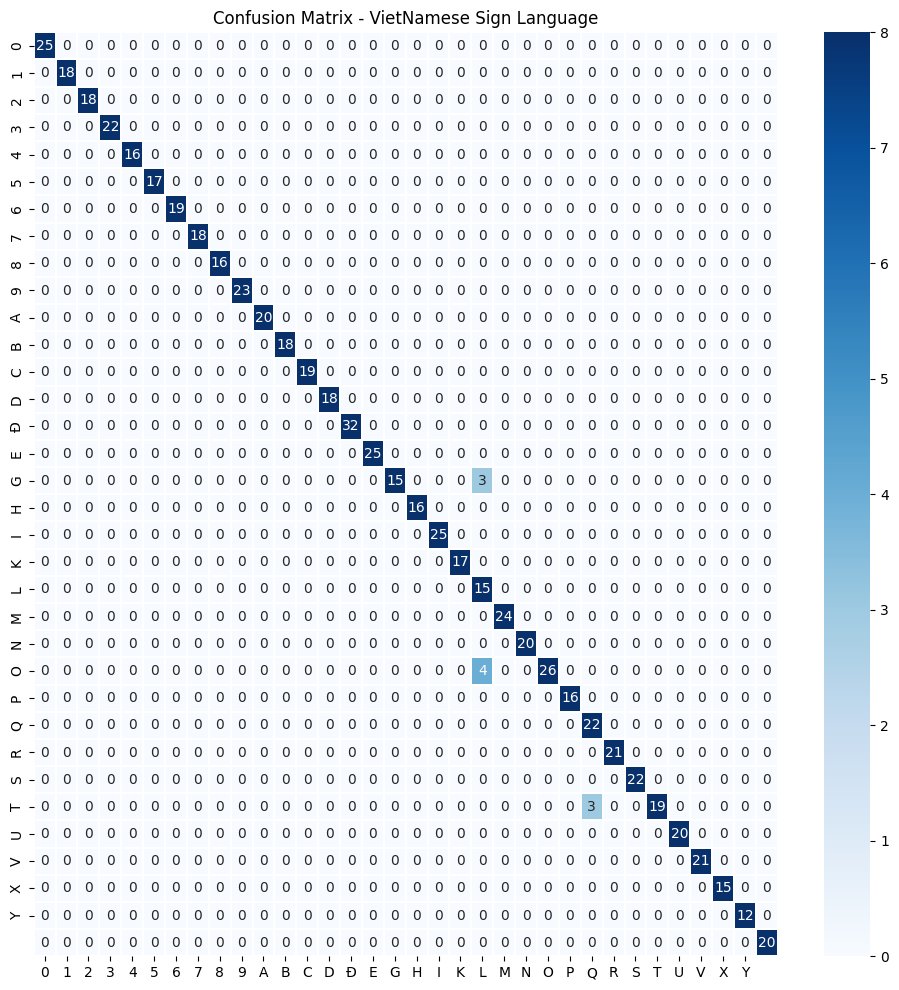

In [9]:
custom_order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                'A', 'B', 'C', 'D', 'Đ', 'E', 'F', 'G', 'H', 'I', 
                'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 
                'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Lấy các labels có trong dataset và sắp xếp theo thứ tự tùy chỉnh
available_labels = list(set(df['Output']))
labels = [x for x in custom_order if x in available_labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - VietNamese Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)

Accuracy: 0.9852941176470589
Error rate: 0.014705882352941124
Model does not support probability prediction.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        23
           A       1.00      1.00      1.00        20
           B       1.00      1.00      1.00        18
           C       1.00      1.00      1.00        19
           D       1.00      1.00      1.00        18
           E       1.00      1.00      1.00        32
           G       1.00   

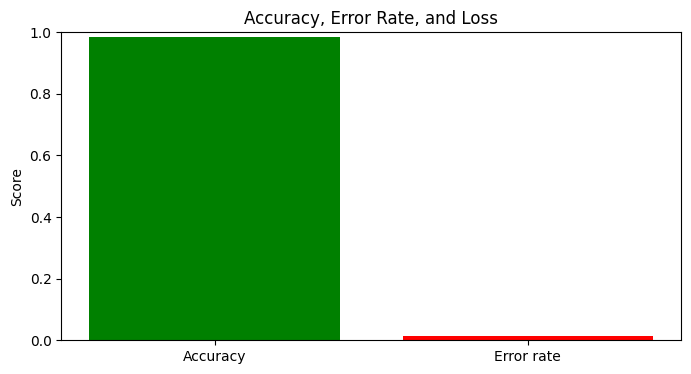

In [11]:
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Độ lỗi
error_rate = 1 - accuracy
print("Error rate:", error_rate)

# Hàm mất mát (loss) - log_loss nếu model hỗ trợ xác suất
le = LabelEncoder()
y_test_num = le.fit_transform(y_test)
if hasattr(svm, "predict_proba"):
    try:
        y_pred_proba = svm.predict_proba(x_test)
        loss = log_loss(y_test_num, y_pred_proba)
        print("Loss (log_loss):", loss)
    except:
        loss = None
        print("Không tính được loss do model không hỗ trợ xác suất.")
else:
    loss = None
    print("Model does not support probability prediction.")

# Báo cáo chi tiết
print(classification_report(y_test, y_pred))

# Biểu đồ trực quan hóa độ chính xác, độ lỗi, hàm mất mát
plt.figure(figsize=(8,4))
if loss is not None:
    plt.bar(['Accuracy', 'Error rate', 'Loss'], [accuracy, error_rate, loss], color=['green', 'red', 'blue'])
else:
    plt.bar(['Accuracy', 'Error rate'], [accuracy, error_rate], color=['green', 'red'])
plt.ylim(0, 1)
plt.title('Accuracy, Error Rate, and Loss')
plt.ylabel('Score')
plt.show()